In [1]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
import librosa
import librosa.display

# matplotlibをjupyter内で表示させるおまじない
%matplotlib inline

In [2]:
IN_WAVE_FILE = "in.wav"  # モノラル音声（前提）

In [3]:
FRAME_LENGTH = 1024  # フレーム長
HOP_LENGTH = 80  # フレームのシフト長

In [4]:
# 音声データ読み込み (fsがサンプリング周波数、dataは音声データ)
fs, data = wavfile.read(IN_WAVE_FILE)
data = data.astype(np.float64)

In [5]:
# 短時間フーリエ変換
data_stft = librosa.stft(data, hop_length=HOP_LENGTH, n_fft=FRAME_LENGTH)

# 振幅スペクトル
data_ampspec = np.abs(data_stft)

# 振幅スペクトルをデシベルスケールにする
data_ampspec_dB = librosa.amplitude_to_db(data_ampspec, ref=np.max)

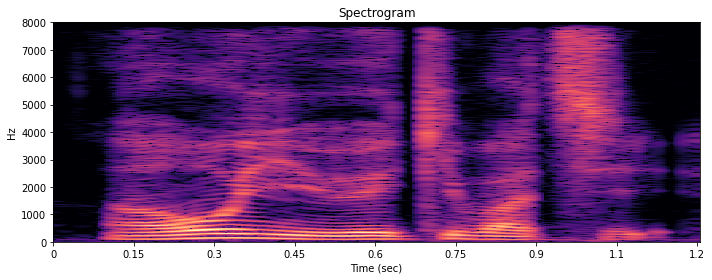

In [7]:
# プロット枠を確保 (10がヨコのサイズ、4はタテのサイズ)
plt.figure(figsize=(10, 4))

# スペクトログラムの表示
librosa.display.specshow(
    data_ampspec_dB, x_axis="time", y_axis="linear", hop_length=HOP_LENGTH, sr=fs
)

# x軸のラベル
plt.xlabel("Time (sec)")

# y軸のラベル
plt.ylabel("Hz")

# 画像のタイトル
plt.title("Spectrogram")

# 余白を少なくする
plt.tight_layout()